# Airbnb Listings & Reviews

Airbnb data for 250,000+ listings in 10 major cities, including information about hosts, pricing, location, and room type, along with over 5 million historical reviews.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read dataset

In [2]:
df_listings=pd.read_csv("Listings.csv",encoding="latin1")

In [3]:
df_listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


# Clean data

In [4]:
df_listings['host_since']=pd.to_datetime(df_listings['host_since'])

# Select columns

In [5]:
listings=df_listings[df_listings['city']=='Paris'][['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]

In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [7]:
listings.isnull().sum()

host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [8]:
listings.describe()

,accommodates,price
count,64690.000000,64690.000000
mean,3.037997,113.096445
std,1.588766,214.433668
min,0.000000,0.000000
25%,2.000000,59.000000
50%,2.000000,80.000000
75%,4.000000,120.000000
max,16.000000,12000.000000


# Prepare the data for visualization

In [9]:
paris_listings_neighbourhood=listings.groupby('neighbourhood')['price'].mean().sort_values()
paris_listings_neighbourhood

neighbourhood
Menilmontant            74.942257
Buttes-Chaumont         82.690182
Buttes-Montmartre       87.209479
Reuilly                 89.058402
Popincourt              90.559459
Gobelins                98.110184
Observatoire           101.866801
Batignolles-Monceau    102.612702
Enclos-St-Laurent      102.967156
Vaugirard              106.831330
Opera                  119.038644
Pantheon               122.662150
Temple                 138.446823
Hotel-de-Ville         144.472110
Bourse                 149.496801
Luxembourg             155.638639
Palais-Bourbon         156.856578
Passy                  161.144635
Louvre                 175.379972
Elysee                 210.536765
Name: price, dtype: float64

In [10]:
paris_listings_accomodations=listings.groupby('accommodates').agg({'price':np.mean})
paris_listings_accomodations

,price
accommodates,
0,0.000000
1,64.847055
2,84.070550
3,98.231924
4,125.990255
5,165.160757
6,217.147059
7,261.065957
8,324.770308


In [11]:
listings['year']=listings['host_since'].dt.year.fillna(0).astype(int) # fill null nalue in year with 0
paris_listings_over_time=listings.groupby('year').agg({'price':['mean','count']})
paris_listings_over_time.columns=['price','num'] #rename column
paris_listings_over_time=paris_listings_over_time[1:] # for elimate rows with year=0
paris_listings_over_time

,price,num
year,,
2008,77.750000,4
2009,159.641509,106
2010,125.031250,416
2011,124.828230,1339
2012,111.578615,4592
2013,107.096414,8142
2014,100.253800,10922
2015,103.646250,12147
2016,114.159847,8871


# Visualize the data and summarize findings

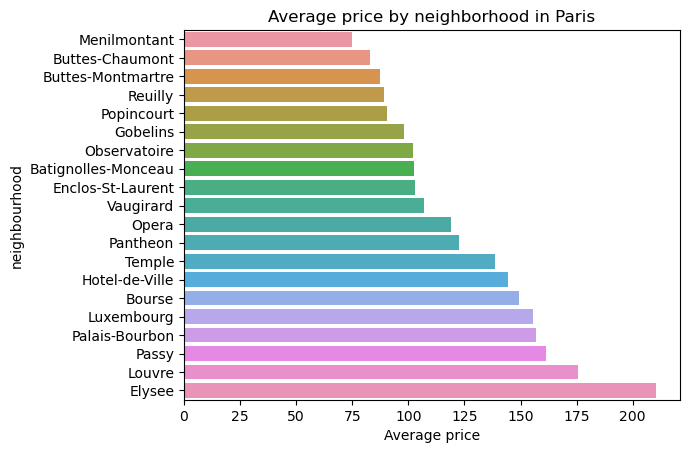

In [16]:
sns.barplot(x=paris_listings_neighbourhood.values,y=paris_listings_neighbourhood.index,orient = 'h')
plt.title('Average price by neighborhood in Paris')
plt.xlabel('Average price')
plt.show()

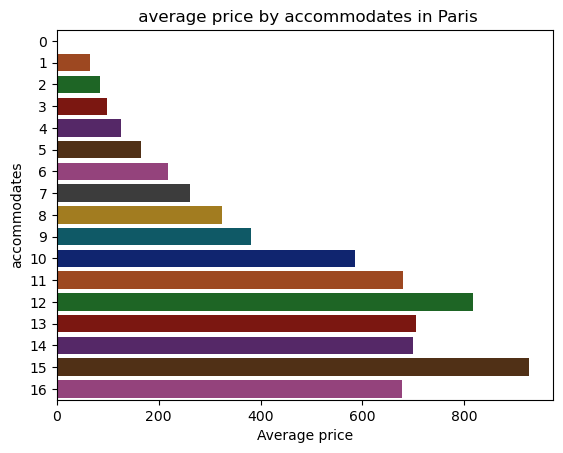

In [13]:
sns.barplot(x=list(np.concatenate(paris_listings_accomodations.values)),y=paris_listings_accomodations.index,orient = 'h',palette='dark')
plt.title(' average price by accommodates in Paris')
plt.xlabel('Average price')
plt.show()

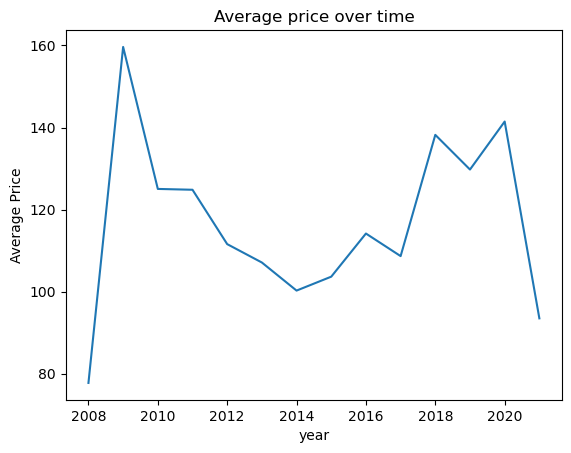

In [14]:
sns.lineplot(data=paris_listings_over_time,x='year',y='price')
plt.title('Average price over time')
plt.ylabel('Average Price')
plt.show()

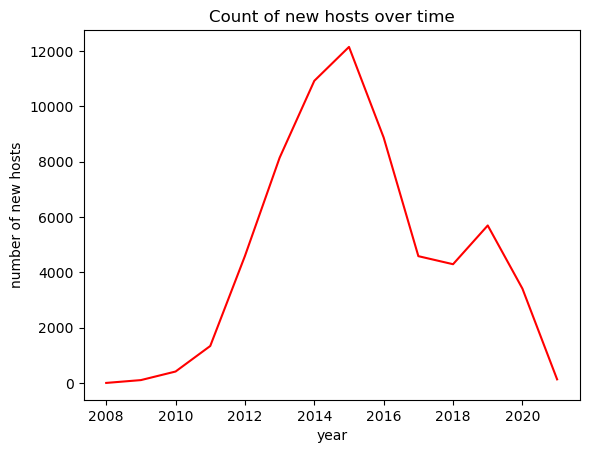

In [15]:
sns.lineplot(data=paris_listings_over_time,x='year',y='num',c='red')
plt.title('Count of new hosts over time')
plt.ylabel('number of new hosts')
plt.show()

Question1: what insights do you have about the impact of the 2015 regulations on new hosts and prices?<br>
in 2015 the number of new host joined Airbnb are increased and after this year decreased. in other word this year had the maximum number of new host joined Airbnb among other years.

Question2: Which neighborhood in Paris has the highest average AirBnB listing price?<br>
According to firs plot "Elysee" has the the highest average AirBnB listing price